# Statistical Learning Project

## Data Description:
#### The data at hand contains medical costs of people characterized by certain attributes.

## Domain:
#### Healthcare

## Context:
#### Leveraging customer information is paramount for most businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions. Hence, knowing to explore and generate value out of such data can be an invaluable skill to have.

## Objective: 
#### Deep dive into this data to find some valuable insights.



### 1. Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import copy
%matplotlib inline

### 2. Read the data as a data frame 'Data'

In [2]:
Data = pd.read_csv('insurance.csv')#Import the dataset named 'insurance.csv'
Data.head()                        #Checking the first five data from dataset using head function

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 3. Performing EDA Operation on Data

#### 3.a. Shape of the data

In [3]:
Data.shape    #shape of data shows that there are 1338 rows and 7 coulumns in data.

(1338, 7)

#### 3.b. Data type of each attribute

In [4]:
Data.info() #This shows data type of each attribute and number of value present in each attribute.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


* Form the above obeservation there some data type of Object. We need to convert them into valid data type.

#### 3.c. Checking the presence of missing values

In [5]:
Data.isnull().sum() #As shown in below result there is no null data present in the given dataset.

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### 3.d. Five point summary of numerical attributes

The five number summary helps describe the center, spread and shape of data. The five summary statistics are as follows,
&nbsp;

* Median: The middle value in the sample, also called the 50th percentile or the 2nd quartile.
* 1st Quartile: The 25th percentile.
* 3rd Quartile: The 75th percentile.
* Minimum: The smallest observation in the sample.
* Maximum: The largest observation in the sample.

####  1. Median

In [6]:
print("Data:",Data.median())  # Print the median values of the data. Also Known as 2nd Quartile.

Data: age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64


#### 2.  1st Quartile

In [7]:
print("Data_quantile(25%):",Data.quantile(q=0.25))  # Prints the value below which 25% of the data lies.

Data_quantile(25%): age           27.00000
bmi           26.29625
children       0.00000
charges     4740.28715
Name: 0.25, dtype: float64


#### 3. 3rd Quartile

In [8]:
print("Data_quantile(75%):",Data.quantile(q=0.75)) #Prints the value below which 75% of data lies.

Data_quantile(75%): age            51.000000
bmi            34.693750
children        2.000000
charges     16639.912515
Name: 0.75, dtype: float64


#### 4. Minimum

In [9]:
print("Data:  ", Data.min()) #Prints the minimum value of each attribute.

Data:   age                18
sex            female
bmi             15.96
children            0
smoker             no
region      northeast
charges       1121.87
dtype: object


#### 5. Maximum

In [51]:
print("Data: " ,Data.max()) #Prints the Maximum Value of each attribute.

Data:  age                64
sex              male
bmi             53.13
children            5
smoker            yes
region      southwest
charges       63770.4
dtype: object


In [52]:
Data.describe() #The Output shows 5 Number summery.

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


##### Five Point summey shown by Boxplot as follow:

Text(0.7, 30.5, 'IQR')

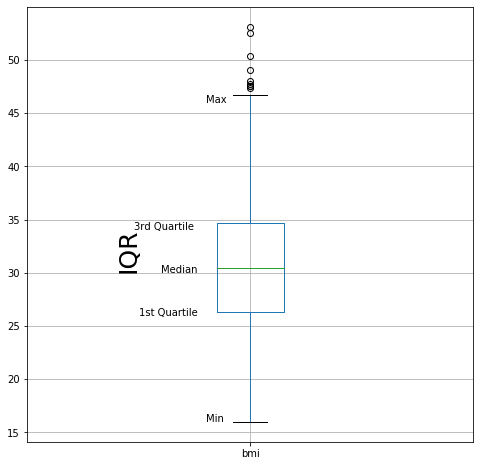

In [53]:
# Create boxplot for column="TOEFL Score"
Data.boxplot(column="bmi",return_type='axes',figsize=(8,8))

# create text(x=0.74, y=22.25, s="3rd Quartile")like Median, 1st Quartile,Min,Max,IQR:
plt.text(x=0.74, y=34.00, s="3rd Quartile")
plt.text(x=0.8, y=30.00, s="Median")
plt.text(x=0.75, y=26.00, s="1st Quartile")
plt.text(x=0.9, y=16.00, s="Min")
plt.text(x=0.9, y=46.00, s="Max")
plt.text(x=0.7, y=30.5, s="IQR", rotation=90, size=25)

### 3.e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

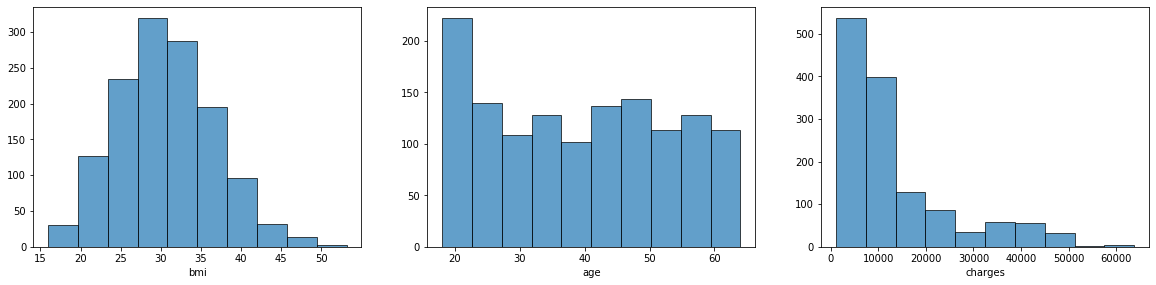

In [54]:
#Plots to see the distribution of the continuous features individually

plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(Data.bmi, edgecolor = 'black', alpha = 0.7)
plt.xlabel('bmi')

plt.subplot(3,3,2)
plt.hist(Data.age, edgecolor = 'black', alpha = 0.7)
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(Data.charges, edgecolor = 'black', alpha = 0.7)
plt.xlabel('charges')

plt.show()

1. bmi: bmi plot shows that bmi of people is normally distributed and very less skewness is present.
2. Age: Age varible shows that 20 year old people participation is higher than other age category.
3. Charges: Charges of isurance is highly skew to the left side. Most of the people prefer 10000 charges of insurance category.

####  Plotting Multivariate distributions
 Multivariate analysis is performed to understand interactions between different fields in the dataset (or) finding interactions between variables more than 2.
ex: Pairplot, 3D scatter plot

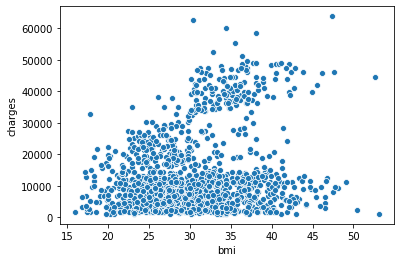

In [55]:
#Plot bmi vs Charges
sns.scatterplot(Data['bmi'],Data['charges'])

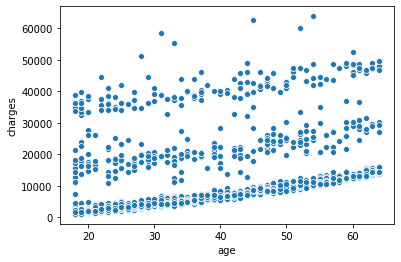

In [56]:
#Plot for Age Vs Charges
sns.scatterplot(Data['age'],Data['charges'])

##### The above graph shows that  as Age goes on increasing insurances charges goes high. There are 3 different category of insurance pricing. 

#### Pairplot: 
Ploting Pairplot which creates a matrix of axes and shows the relationship for each pair of columns in a DataFrame. By default, it also draws the univariate distribution of each variable on the diagonal Axes:

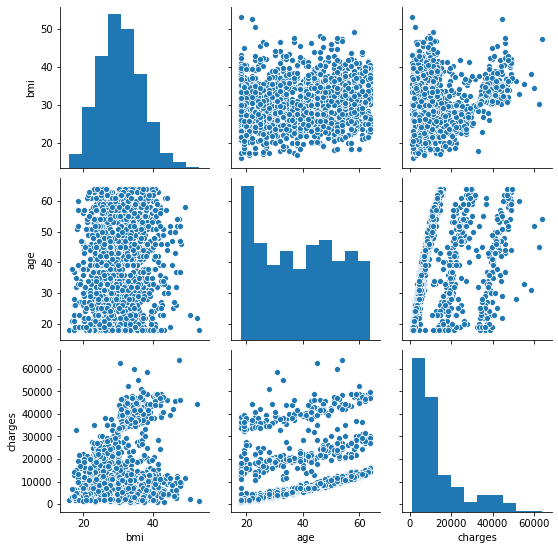

In [57]:
#visualizing ditribution of 'bmi', 'age' and 'charges' using pairplot
sns.pairplot(Data[['bmi', 'age','charges']])

* The graph represents Age and Charges are highly Corelated. It is showing 3 diffrenet category based on isurance amount. Most of the people prefers the insurance approximately below 10K. 
* There is faire amount of corelation between bmi and charges.

### 3.f  Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

**Positively skewed:** Most frequent values are low and tail is towards high values.

**Negatively skewed:** Most frequent values are high and tail is towards low values.

If **Mode< Median< Mean** then the distribution is positively skewed.

If **Mode> Median> Mean** then the distribution is negatively skewed.

In [58]:
Data.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

C:\Users\RUPTRE01\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':


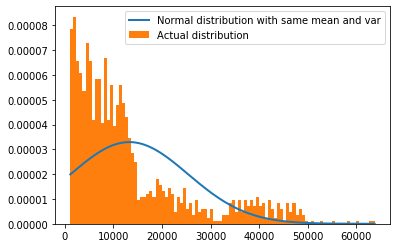

In [59]:
import scipy.stats as stats

#convert pandas DataFrame object to numpy array and sort
h = np.asarray(Data['charges'])
h = sorted(h)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(h,normed=True,bins = 100,label="Actual distribution")      
plt.legend()
plt.show()

* Skewness for 'charges' is 1.51 and most of the data distribution towards left. Hence the distribution of the data left skew.

C:\Users\RUPTRE01\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


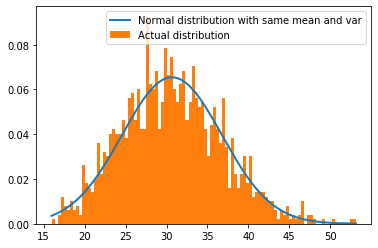

In [60]:

#convert pandas DataFrame object to numpy array and sort
h = np.asarray(Data['bmi'])
h = sorted(h)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(h,normed=True,bins = 100,label="Actual distribution")      
plt.legend()
plt.show()

* Skewness of bmi is 0.28 and data of bmi is uniformly distributed. There is negligible amount of skewness present in data.


C:\Users\RUPTRE01\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


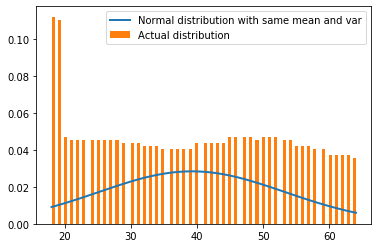

In [61]:

#convert pandas DataFrame object to numpy array and sort
h = np.asarray(Data['age'])
h = sorted(h)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(h,normed=True,bins = 100,label="Actual distribution")      
plt.legend()
plt.show()

* The distribution of the records are flatern. The uniform distribution is spreded over the data. Very smaller shape of bell curve is visible. Hence skewness is present in data*

### 3.g Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

* Presence of datapoints beyond the whiskers/fences dosn't necessarily mean there are outliers
* The rule that box plot follows to decide what should be an outlier is that "any point greater than Q3 + 1.5IQR or lesser than Q1 - 1.5IQR is an outlier "

#### Outlier for bmi

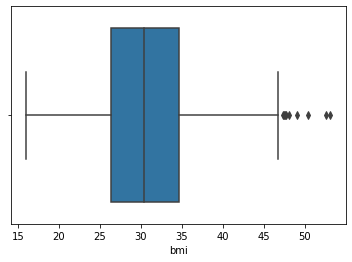

In [62]:
sns.boxplot(Data['bmi'])

* Few outliers present in the above boxplot for bmi attribute.

In [63]:
#Identify outlier for bmi
q25, q75 = np.percentile(Data['bmi'], 25), np.percentile(Data['bmi'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in Data['bmi'] if x < lower or x > upper]
print('Identified outliers for age out of 1338 records: %d' % len(outliers))

Identified outliers for age out of 1338 records: 9


#### Outlier for Age

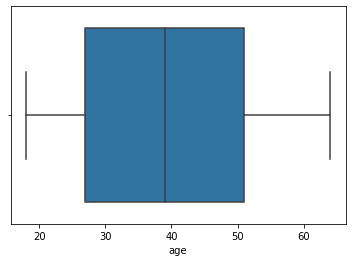

In [64]:
sns.boxplot(Data['age'])

* No outlier present for Age attribute.

In [65]:
#Identify outlier for Age
q25, q75 = np.percentile(Data['age'], 25), np.percentile(Data['age'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in Data['age'] if x < lower or x > upper]
print('Identified outliers for age out of 1338 records: %d' % len(outliers))

Identified outliers for age out of 1338 records: 0


#### Outlier for Charges

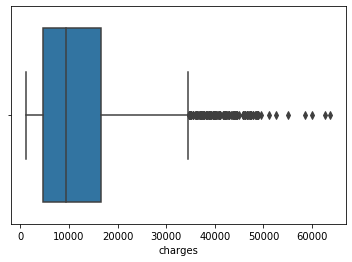

In [66]:
sns.boxplot(Data['charges'])

* There are multiple outlier present in the charges. Looking the code and the output above, it is difficult to say which data point is an outlier.*

In [67]:
#identify outliers for charges

q25, q75 = np.percentile(Data['charges'], 25), np.percentile(Data['charges'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in Data['charges'] if x < lower or x > upper]
print('Identified outliers for charges out of 1138: %d' % len(outliers))

Identified outliers for charges out of 1138: 139


### 3.h Distribution of categorical columns (include children)

male      676
female    662
Name: sex, dtype: int64


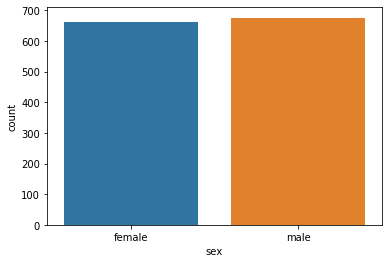

In [68]:
#Count of sex
print(Data.sex.value_counts())
sns.countplot(Data['sex'])

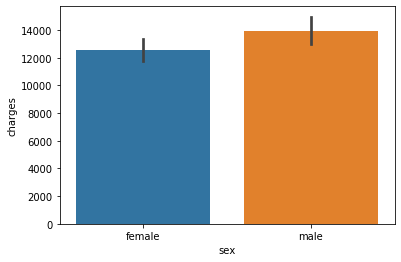

In [69]:
#Barchart for Sex vs Charges
sns.barplot(Data['sex'],Data['charges'])

* As per the above bar chart male having more charges than female.

no     1064
yes     274
Name: smoker, dtype: int64


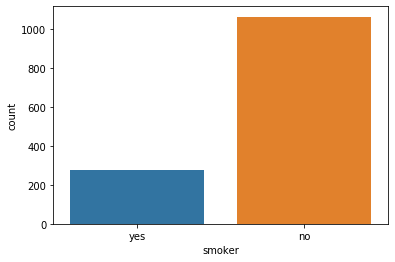

In [70]:
#Count of smoker
print(Data.smoker.value_counts())
sns.countplot(Data['smoker'])

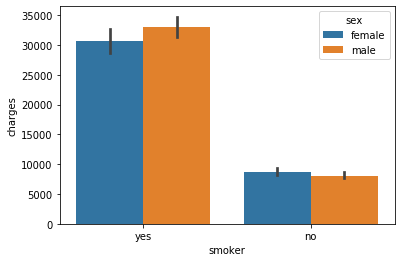

In [71]:
#Barchart for Smoker & Sex vs Charges
sns.barplot(Data['smoker'],Data['charges'], hue = Data['sex'])

* This Plot shows the person who is smoker is having more charges than the non- smoker person.
* There are more Male smoker as compare to Female and having higher insurance charges. 

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


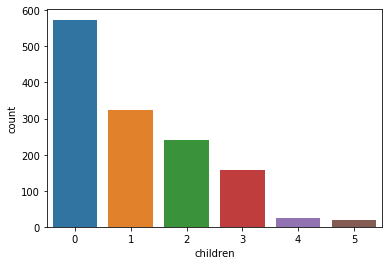

In [72]:
#count of children
print(Data.children.value_counts())
sns.countplot(Data['children'])

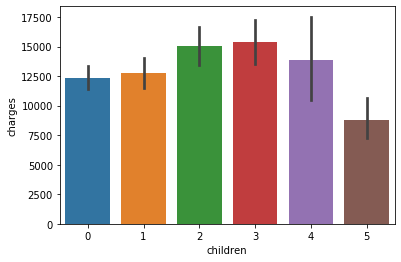

In [73]:
#Bar Plot Children vs Chaarges
sns.barplot(Data['children'],Data['charges'])

* The above graph represent children vs charges. Graph is increasing till 3 children and going down after 3. It seems like those who are not having children have higher isurance chanrges than the people who have 4 and 5 children.

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


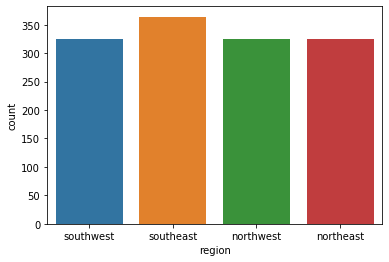

In [74]:
#count of region
print(Data.region.value_counts())
sns.countplot(Data['region'])

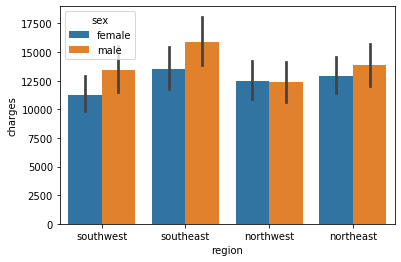

In [75]:
#Barplot Region and Sex Vs Charges
sns.barplot(Data['region'], Data['charges'], hue = Data['sex'])

* The above plot shows that some region having higher charges. Southeast region has comparitively high charges than the other region and it is also varies by gender.
* There is stronger correlation between region, sex and charges.

### 3.i Pair plot that includes all the columns of the data frame

Converting String to numeric data to plot the pairplot graph because pairplot ignores the string data. 
To encode the data LableEncoder method is used.

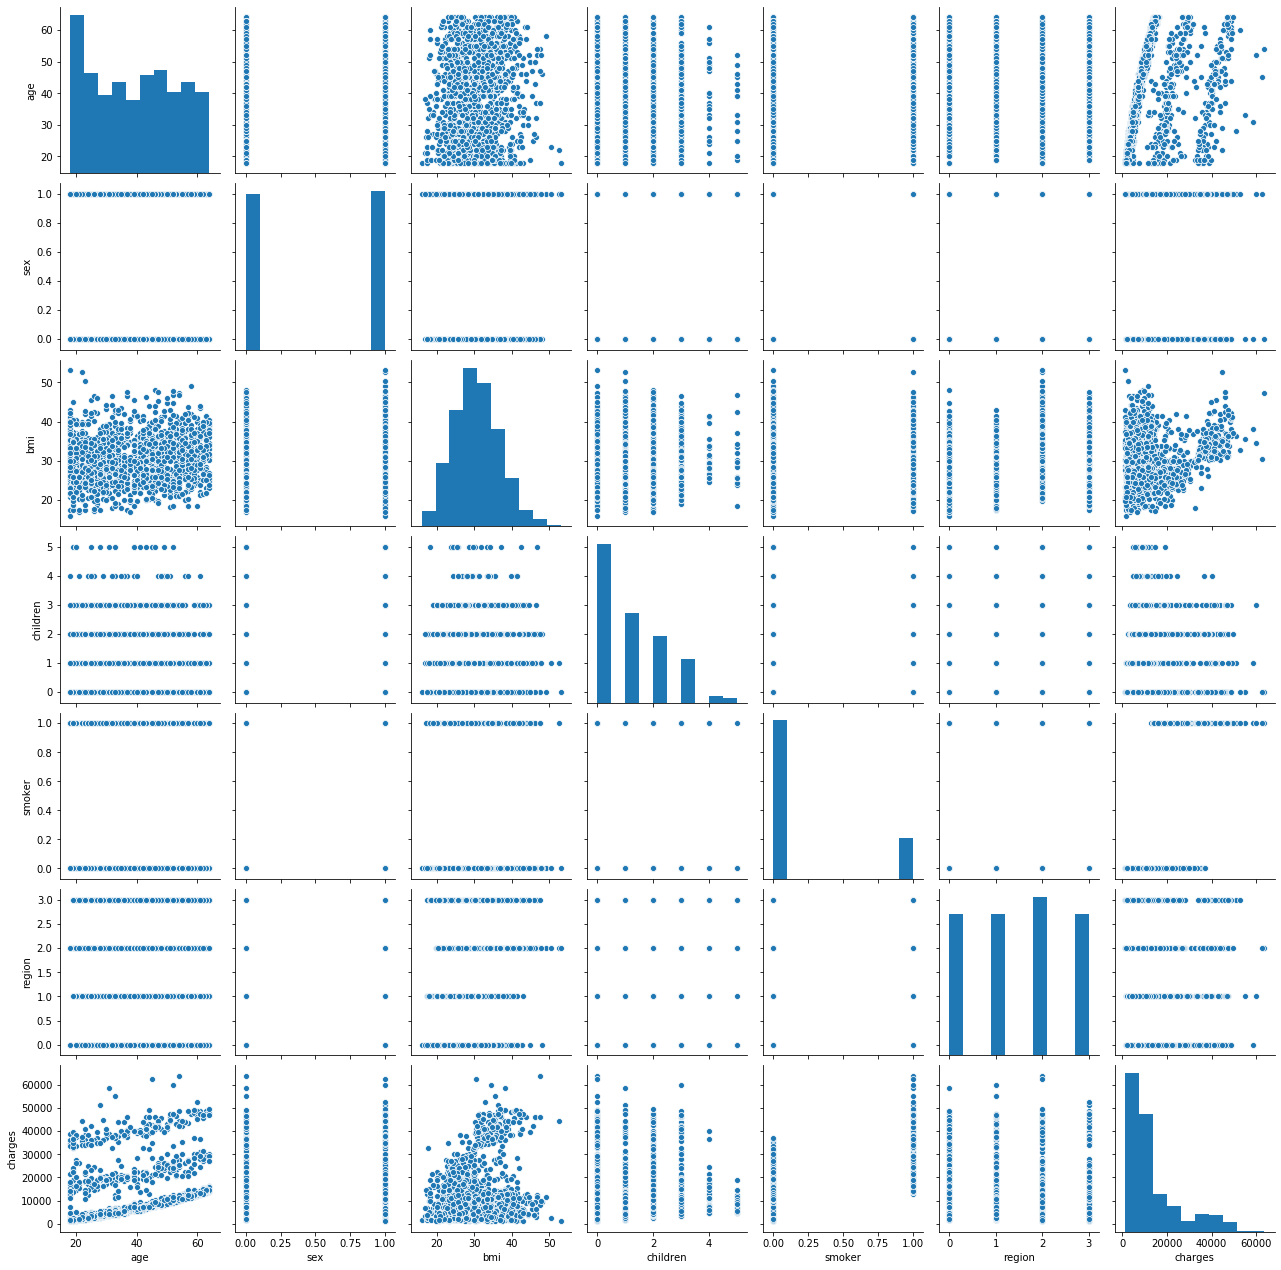

In [76]:
Data1 = copy.deepcopy(Data)
Data1.loc[:,['sex', 'smoker', 'region']] = Data.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 
sns.pairplot(Data1)

* The above pairplot showing relation between each and every attribute. There are some graph which are showing strong corelation. 
* The graph represents Age and Charges are highly Corelated. It is showing 3 diffrenet category based on isurance amount. Most of the people prefers the insurance approximately below 10K. 
* There is faire amount of corelation between bmi and charges.
* There is some corelation between age and bmi present.
* Corelation is present between charges vs bmi.

### 4.  Answer the following questions with statistical evidence

#### 4.a Do charges of people who smoke differ significantly from the people who don't?

In [77]:
Data.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

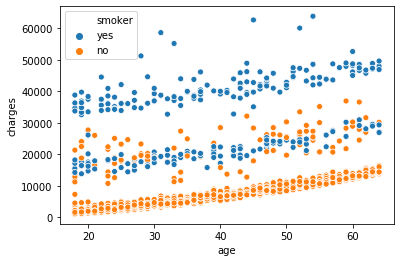

In [78]:
sns.scatterplot(Data['age'],Data['charges'], hue= Data['smoker'])

* The above visualization shows that the people who are smoker having significantly higher charges of insurance than the non smoker people.
* Smoker people are mostly falls under higher insurance amount criteria.

In [79]:
#Applying T-test to determine the impact of smoking on the charges.
Ho = "Charges of smoker and non-smoker are same"   
Ha = "Charges of smoker and non-smoker are not the same"

x = np.array(Data[Data.smoker == 'yes'].charges) 
# Selecting charges corresponding to smokers as an array
y = np.array(Data[Data.smoker == 'no'].charges)
# Selecting charges corresponding to non-smokers as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

print(p_value)

8.271435842177219e-283


* Rejecting the null hypothesis as the p_value is lesser than 0.05. It tells us that the paid charges by the smokers and non-smokers is significantly different. Smokers pay higher charges in comparison to the non-smokers.

#### 4.b Does bmi of males differ significantly from that of females?

In [80]:
Data.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

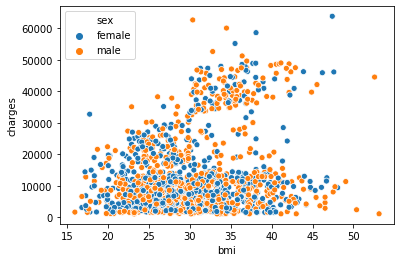

In [81]:
sns.scatterplot(Data['bmi'],Data['charges'], hue = Data['sex'])

* The graph is not giving clear idea about the data. Hence below stats method is used.

In [82]:
##### Check dependency of bmi on gender.#Performing an Independent t-test
Ho = "Gender has no impact on bmi"   
Ha = "Gender has an impact on bmi"   

x = np.array(Data[Data.sex == 'male'].bmi)  
y = np.array(Data[Data.sex == 'female'].bmi) 

t, p_value  = stats.ttest_ind(x,y, axis = 0)  

print(p_value)

0.08997637178984932


* The P value is 0.089 > 0.05 therefore accepting the Null Hypothesis. Hence we conclude that Gender has no impact on bmi.

#### 4.c Is the proportion of smokers significantly different in different genders?

In [83]:
# We will perform Chi_square test to check the proportion of smokers differs as per gender.
Ho = "Gender has no effect on smoking habits" 
Ha = "Gender has an effect on smoking habits"   

crosstab = pd.crosstab(Data['sex'],Data['smoker']) 
chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)
print(p_value)

0.006548143503580696


*  P value i.e. 0.006 is less than 0.05 hence rejecting Null Hypothesis and conclude that smoking habits differs with the gender.

#### 4.d Is the distribution of bmi across women with no children, one child and two children, the same

In [84]:

# Applying anova test to check the proportion.
Ho = "No. of children has no effect on bmi"   
Ha = "No. of children has an effect on bmi"   

female_df = copy.deepcopy(Data[Data['sex'] == 'female'])

zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']

f_stat, p_value = stats.f_oneway(zero,one,two)
print(p_value)

0.7158579926754841


* In this example p value is 0.7158 > 0.05 so we accepting the Null Hypothesis.
* Hence, we conclude that number of children has no effect on women's bmi.